<center>
<img src="../img/ml_theme.png">
# MLClass. "Прикладной анализ данных"
# Модуль "Машинное обучение с помощью Python"
<img src="../img/mlclass_logo.jpg" height="240" width="240">
#### Интенсивный курс по изучению машинного обучения и анализа данных
## Авторы материала: преподаватель ФКН НИУ ВШЭ Кашницкий Юрий, магистрант ВМК МГУ Евгений Колмаков
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# Занятие 2. Обзор средств  анализа данных на языке Python
## Часть 2. Обзор пакета SciPy

**SciPy** - это библиотека для Python, содержащая множество математических алгоритмов и предназначенная для выполнения научных расчётов. С его помощью можно решать широкий класс математических задач, возникающих в ходе научной деятельности.

In [1]:
from __future__ import division, print_function
import numpy as np
%pylab inline
figsize(12, 8)
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


#### Линейная алгебра

Прежде всего SciPy предоставляет множество функций, имеющих отношение к линейной алгебре. Рассмотрим некоторые примеры.

In [2]:
from scipy.linalg import *

X = np.array([[1,2,3],[4,5,6],[7,8,9]]) # X is singular, so det(X) = 0
det(X)

0.0

Посчитаем собственные значения и вектора матрицы X.

In [3]:
V, U = eig(X)
V

array([  1.61168440e+01+0.j,  -1.11684397e+00+0.j,  -1.30367773e-15+0.j])

Проверим, что первый столбец матрицы U является собственным вектором, соответствующим собственному значению V[0].

In [4]:
norm((X - V[0] * np.eye(3)).dot(U[:,0]))

5.687116766346677e-15

Рассмотрим следующую задачу. На плоскости дано четыре точки $P_1 = (0, 4), P_2 = (0.5, 8), Q_1 = (0, 0), Q_2 = (3, 1)$. Первые две точки принадлежат одному классу, вторые две - другому. Рассмотрим две полосы. Первая из них находится между прямыми, одна из которых проходит через $P_1$ и $P_2$, а вторая - через $Q_1$ параллельно ей. Вторая из них находится между прямыми, одна из которых проходит через $Q_1$ и $Q_2$, а вторая - через $P_1$ параллельно первой. Какая из этих полос имеет большую ширину?

C:\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


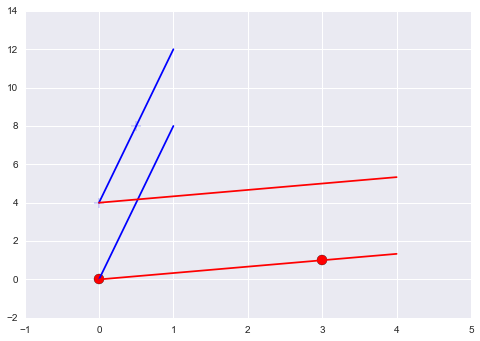

In [5]:
P = np.array([[0, 4], [0.5, 8]])
Q = np.array([[0, 0], [3, 1]])
plt.scatter(P[:, 0], P[:, 1], c = 'b', marker = '+', s = 100)
plt.scatter(Q[:, 0], Q[:, 1], c = 'r', s = 100)
plt.plot([i*8 + 4 for i in range(2)], color="blue")
plt.plot([i*8 for i in range(2)], color="blue")
plt.plot([i*1/3 for i in range(5)], color="red")
plt.plot([i*1/3 + 4 for i in range(5)], color="red")
plt.show()

In [6]:
w1 = P[1, :] - P[0, :]
# Normal vector of the line through P0, P1
w1 = np.array([-w1[1], w1[0]]) 
# Equation of line is <w1, x> - b1 = 0, and P0 belongs to this line
b1 = w1.dot(P[0, :]) 

w2 = Q[1, :] - Q[0, :] # Same for Q0, Q1
w2 = np.array([-w2[1], w2[0]])
b2 = w1.dot(Q[0, :])

# Distance from Q0 to the first line
width1 = np.abs(w1.dot(Q[0, :]) - b1) / norm(w1) 
# Distance from P0 to the second line
width2 = np.abs(w2.dot(P[0, :]) - b2) / norm(w2) 

width1 < width2

True

**Где это нужно**

Самая простая версия машины опорных векторов (Support Vector Machine, SVM) - линейная, когда классы линейно разделимы.

В таком случае алгоритм сводится к максимизации "зазора" между классами.

<img src="../img/svm_linear2.png">

Здесь красная разделяющая прямая - лучшая, максимизирует зазор между классами. Красным также обведены объекты, через которые были проведены граничные прямые, параллельные разделяющей. Это и есть опорные вектора.
SVM обучается долго, зато потом для классификации достаточно опорных векторов. 

<img src="../img/svm_linear3.png">


**Сингулярное разложение**

В SciPy реализованы основные матричные разложения, например, SVD, QR, LU и другие. Отдельного внимания заслуживает SVD-разложение (или сингулярное разложение) матриц. Допустим, что $A$ это $m\times n$ матрица. Тогда матрицы $AA^T$ и $A^TA$ являются симметрическими, и поэтому имеют вещественные неотрицательные собственные значения, которые называются сингулярными числами матрицы $A$. Тогда исходную матрицу можно представить в виде $A = U\Sigma V^T$, где $U, V$ - матрицы, столбцами которых являются собственные векторы матриц $AA^T$ и $A^TA$ соответственно, а $\Sigma$ матрица такого же размера, как и $A$, имеющая нули везде, кроме главной диагонали, на которой стоят сингулярные числа.

In [7]:
A = np.array([[1, -2, 3], [-4, 5, -6]])
U, s, Vh = svd(A) # s is the array of singular values
print(s)
Sigma = diagsvd(s, 2, 3)
U.dot(Sigma.dot(Vh))

[ 9.508032    0.77286964]


array([[ 1., -2.,  3.],
       [-4.,  5., -6.]])

**Где это нужно**
<center> 
<img src="../img/plot_pca_3d_1.png" style="max-width: 300px; display: inline" />
<img src="../img/plot_pca_3d_2.png"style="max-width: 300px; display: inline" />
</center> 
Метод главных компонент, <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering">спектральная кластеризация</a>, <a href="http://habrahabr.ru/company/surfingbird/blog/139863/">рекомендательные системы</a>

С помощью SciPy можно вычислять определённые интегралы:

In [8]:
from scipy.integrate import quad
I1, e = quad(lambda x: x ** 2, -3, 3) 
I2, e = quad(lambda x: x ** 3, -3, 3)
I1, I2

(18.0, 0.0)

#### Оптимизация

Ещё одним большим разделом, реализованным в SciPy, является оптимизация. В этом пакете реализовано большое число методов одномерной и многомерной оптимизации, выбирать которые можно изменяя параметр method в соответствующих функциях.

In [9]:
from scipy.optimize import minimize

f = lambda x: norm(x) ** 2 + 1
der_f = lambda x: 2 * x

res = minimize(f, [-10.0, 10.0], jac = der_f, method = 'SLSQP')

Для функций одной переменной рекомендуется использовать другой метод:

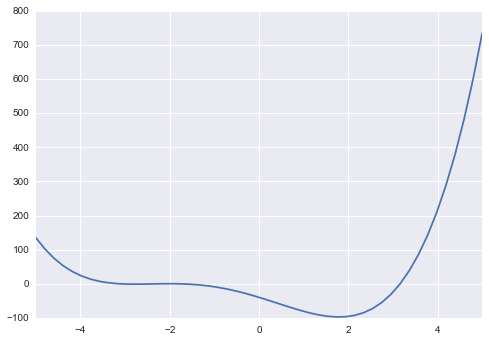

In [10]:
from scipy.optimize import minimize_scalar

f = lambda x: (x ** 2 - 10) * (x + 2) ** 2
x = np.linspace(-5, 5)

plt.plot(x, f(x))
plt.xlim((-5, 5))
plt.show()

In [11]:
res = minimize_scalar(f, method = 'brent')
res

  fun: -97.617044797036328
 nfev: 11
  nit: 10
    x: 1.7912878483767389

**Где это нужно**

<center>
<img src="../img/SVM_optimize.png" style="display:inline" />
</center>
Линейный SVM по сути - задача квадратичной оптимизации с условиями Каруша-Куна-Таккера.

Можно искать корни уравнений:

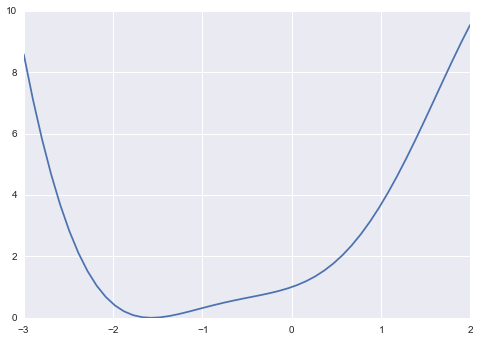

In [12]:
from scipy.optimize import root

f = lambda x: (np.sin(x) + 1) * (x ** 2 + 1)
x = np.linspace(-3, 2)

plt.plot(x, f(x))
plt.xlim((-3, 2))
plt.show()

In [13]:
res = root(f, -1)
print(res)
res.x + np.pi / 2.0 # Comparison with the exact solution

  status: 1
 success: True
     qtf: array([ -7.69917695e-16])
    nfev: 37
       r: array([ -6.71338677e-08])
     fun: array([ 0.])
       x: array([-1.57079632])
 message: 'The solution converged.'
    fjac: array([[-1.]])


array([  7.05857883e-09])

#### Статистика

Модуль scipy.stats предоставляет множество инструментов для статистических исследований. В данном реализовано более 80 непрерывных и 10 дискретных распределений. 

Основные методы для непрерывных случайных величин:
- rvs: генерация выборки из данного распределения
- pdf: функция плотности распределения
- cdf: функция распределения
- ppf: функция, обратная к функции распределения (используется для подсчёта квантилей)
- stats: возвращает основные характеристики случайной величины

In [14]:
from scipy import stats
# "Freezing" the standard normal random variable
rv = stats.norm() 
# Generate 1000 samples from standard normal distribution
X = rv.rvs(size = 1000) 
# Comparing sample moments with theoretical
np.mean(X) - rv.mean(), X.var() - rv.var() 

(-0.019120988993415338, -0.047271249623685896)

Стоит отметить, что X.var() возвращает смещённую оценку дисперсии (делённую на N), для получения несмещённой оценки (делённой на N - 1) нужно передать дополнительный параметр:

In [15]:
X.var(ddof = 1)

0.95368243280912324

Для получения сразу всех основных статистик выборки можно использовать функцию describe:

In [16]:
size, Xrange, mean, var, skew, kurt = stats.describe(X)
print(size, Xrange, mean, var, skew, kurt)

1000 (-3.3616876834069052, 3.0234610545629832) -0.0191209889934 0.953682432809 -0.0539658006353 -0.113498906612


In [17]:
# theoretical mean, variance, skew, kurtosis of rv
rv.stats(moments = "mvsk") 

(array(0.0), array(1.0), array(0.0), array(0.0))

Медиана случайной величины - это 0.5-квантиль:

In [18]:
rv.ppf(0.5)

0.0

Функции распределения и плотности принимают на вход массивы Numpy:

In [19]:
x = np.array([-1.0, 0.0, 1.0])
print(rv.cdf(x))
print(rv.pdf(x))

[ 0.15865525  0.5         0.84134475]
[ 0.24197072  0.39894228  0.24197072]


Все непрерывные распределения принимают на вход два параметра loc (от location) и scale. Для нормального распределения они определяют матожидание и стандартное отклонение. Для других видов распределений они будут соответствовать подходящим параметрам, указанным в документации. Например, для гамма распределения scale = 1.0 / lambda, где lambda - параметр распределения.

In [20]:
# Look through 'Notes' section to find the correspondence 
# between loc, scale and the parameters of distribution
stats.gamma?

Некоторые распределения требуют обязательного задания некоторых своих параметров (в отличие, например, от нормального). Для распределения Пуассона это параметр mu.

In [21]:
Y = stats.poisson.rvs(mu = 1, size = 100)
Y.mean(), Y.var()

(0.98999999999999999, 1.0099)

Рассмотрим пример двухмерного нормального распределения (его можно использовать, например, для генерации модельных двухмерных данных, которые удобно визуализировать):

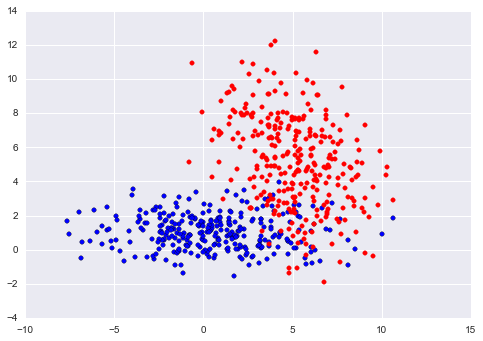

In [22]:
# Mean of the MVN distribution
m1 = np.array([1, 1])
# Covariance matrix of the MVN distribution (should be positive-definite!)
S1 = np.diag(np.array([10, 1])) 
m2 = np.array([5, 5])
S2 = np.array([[5, -5], [1, 5]])

X = stats.multivariate_normal.rvs(m1, S1, size = 300)
Y = stats.multivariate_normal.rvs(m2, S2, size = 300)

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(Y[:, 0], Y[:, 1], color = 'r')
plt.show()

**Где это нужно**
<img src="../img/outlier_detection.png">
Преобразование признаков, поиск выбросов в данных,...

**Метод максимального правдоподобия**

Для параметризованного (с помощью вектора параметров $\theta$) распределения мы можем рассмотреть функцию $f(x_1, \dots, x_n \mid \theta)$ совместного распределения распределения $N$ независимых случайных величин из данного распределения. При наличии выборки $X_1, \dots, X_n$ (то есть реализаций этих случайных величин) мы можем подставить эти значения в функцию $f(X_1, \dots, X_n \mid \theta)$, получив тем самым функцию, зависящую только от неизвестного вектора параметров $\theta$. Данная функция называется функцией правдоподобия выборки $X_1, \dots, X_n$. Метод максимального правдоподобия заключается в решении задачи максимизации этой функции по вектору параметров $\theta$, или эквивалентной ей задачи максимизации логарифма этой функции. Тем самым он позволяет получить оценку $\hat{\theta}$ неизвестных параметров, используя выборку. Оценки максимального правдоподобия обладают рядом хороших свойств. 

Данный метод реализуется функцией fit. Оценим, например, параметры нормального распределения со средним 5 и стандартным отклонением 2 по выборке размера 100:

In [23]:
X = stats.norm.rvs(loc = 5, scale = 2, size = 100)
m, s = stats.norm.fit(X)
print(m, s)

5.07144770233 2.10261197339


**Проверка гипотез**

В SciPy реализованы различные методы проверки статистических гипотез. Рассмотрим некоторые из них.

Для анализа линейной зависимости между двумя выборками можно использовать различные коэффициенты корреляции, например, коэффициент Пирсона. Он меняется в пределах от -1 до 1. Граничные значения соответствуют линейной зависимости, а нулевое значение соответствует отсутствию такой зависимости между величинами. Метод также возвращает $p$-value, соответсвующее проверке гипотезы о линейной независимости. Поэтому если $p$-value достаточно мало, то нулевую гипотезу можно отвергнуть при данном уровне значимости (обычно $\alpha = 0.05$).

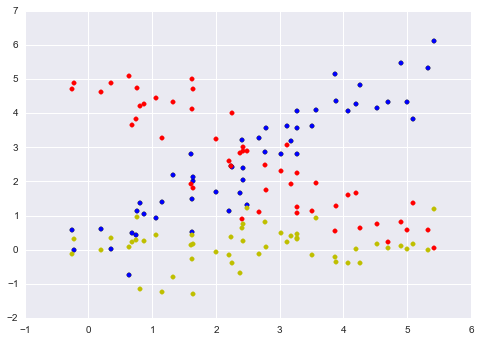

(0.92485266894295493, 8.6894685281842512e-22)
(-0.88222718975559467, 2.5600361038115399e-17)
(0.13099989284590058, 0.36451450521456974)


In [24]:

X = np.linspace(0, 5) + stats.norm.rvs(scale = 0.5, size = 50)
Y1 = np.linspace(0, 5) + stats.norm.rvs(scale = 0.5, size = 50)
Y2 = 5 - np.linspace(0, 5) - stats.norm.rvs(scale = 0.5, size = 50)
Y3 = stats.norm.rvs(scale = 0.5, size = 50)
plt.scatter(X, Y1)
plt.scatter(X, Y2, color = 'r')
plt.scatter(X, Y3, color = 'y')
plt.show()

print(stats.pearsonr(X, Y1)) # (Pearson r-coefficient, p-value)
print(stats.pearsonr(X, Y2))
print(stats.pearsonr(X, Y3))

Проверить гипотезу о том, что выборка пришла из нормального распределения можно с помощью функции normaltest:

In [25]:
from scipy import stats
X = stats.norm.rvs(size = 100)
Y = stats.poisson.rvs(mu = 1, size = 100)

# p-value is not small enough, so we can't reject the null hypothesis
print(stats.normaltest(X)[1]) 
# p-value is small, so we can reject the null hypothesis
print(stats.normaltest(Y)[1]) 

0.494489854159
0.00342454822156


Другим примером является проверка гипотезы о равенстве среднего заданному значению. Стоит отметить, что разные статистические тесты имеют различные предположения о выборке и её распределении, которые обязательно стоит учитывать при проверке гипотез. Например, $t$-критерий Стьюдента предполагает, что выборка имеет нормальное распределение. Поэтому проверим гипотезу о равенстве среднего нулю и единице для выборки X.

In [26]:
# p-value is not small enough, so we can't reject the null hypothesis
print(stats.ttest_1samp(X, popmean = 0)[1]) 
# p-value is small, so we can reject the null hypothesis
print(stats.ttest_1samp(X, popmean = 1)[1]) 

0.839334464927
7.22657833194e-14


**Где это нужно**

Предположения линейной регрессии (проверка распределения ошибок на нормальность ). Показать, что один алгоритм (например, классификации) выдает статистически лучший результат, чем другой.

### Cсылки

- Более подробно о сингулярном разложении: [здесь](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5)
- Общие сведения о задачах оптимизации: <a href="https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_(%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0)">здесь</a>
- Более подробно о функции правдоподобия и методе максимального правдоподобия: [здесь](https://en.wikipedia.org/wiki/Likelihood_function).
- Основные понятия проверки статистических гипотез: [здесь](http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7)